### Project_Harshini_Tammareddy_ht442_Textasdata

#### Dependencies

In [82]:

import pandas as pd

## for graphs
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import export_graphviz
import graphviz
import seaborn as sns
## Text analysis
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis.sklearn
from transformers import pipeline
from textblob import TextBlob

In [2]:
##Loading the data 
df1 = pd.read_csv("speaker_data.csv")
df1.head(2)

,talk,speaker,speaker_title,speaker_occ,speaker_bio
0,Can you outsmart the apples and oranges fallacy?,Elizabeth Cox,NaN,NaN,NaN
1,The exploitation of US college athletes,Tim Nevius,NaN,College sports lawyer,Tim Nevius is a leading sports lawyer and coll...


In [3]:
df1["title"] = df1[["talk"]]
df1 = df1.drop(['talk'], axis=1)


In [4]:
df1.shape

(4442, 5)

In [5]:
df1.dtypes

speaker          object
speaker_title    object
speaker_occ      object
speaker_bio      object
title            object
dtype: object

In [6]:
df2 = pd.read_csv("talk_data.csv")
df2.head(2)

,talk_desc,event,talk_name,views,duration,tags,recorded_at,published on
0,It's 1997. The United States Senate has called...,TED-Ed,Can you outsmart the apples and oranges fallacy?,119359,327,"['education', 'psychology', 'animation', 'TED-...",2021-04-05T00:00:00.000+00:00,1617636753
1,Colleges and universities in the US make billi...,TEDxDayton,The exploitation of US college athletes,438573,611,"['sports', 'law', 'education', 'United States'...",2020-11-10T00:00:00.000+00:00,1617634131


In [7]:
df2.shape

(4322, 8)

In [8]:
df2["title"] = df2[["talk_name"]]
df2 = df2.drop(['talk_name'], axis=1)

In [9]:
df2.dtypes

talk_desc       object
event           object
views            int64
duration         int64
tags            object
recorded_at     object
published on     int64
title           object
dtype: object

In [10]:
df2.dtypes

talk_desc       object
event           object
views            int64
duration         int64
tags            object
recorded_at     object
published on     int64
title           object
dtype: object

In [11]:
df3 = pd.read_csv("transcript_data.csv")
df3.head(3)

,title,transcript
0,Can you outsmart the apples and oranges fallacy?,Baking apple pie? Discount orange warehouse ha...
1,The exploitation of US college athletes,"In college sports, American universities are e..."
2,How does ultrasound work?,"In a pitch-black cave, bats can’t see much. Bu..."


In [12]:
df3.shape

(4442, 2)

In [13]:
df3.dtypes

title         object
transcript    object
dtype: object

The no of rows of df2 doesnt match with the other two dfs. For the project, we need variables from the three datasets and hence merging the three dataframes. But the only column that the data can be merged upon is the title variable, which is text. I am not sure if the entire text matches for each row in the three dfs, but let us see!

In [14]:
df4 = pd.merge(df1,df2, how="inner", on="title")

In [15]:
df5 = pd.merge(df3,df4, how="inner", on="title")

In [16]:
df5.head()

,title,transcript,speaker,speaker_title,speaker_occ,speaker_bio,talk_desc,event,views,duration,tags,recorded_at,published on
0,Can you outsmart the apples and oranges fallacy?,Baking apple pie? Discount orange warehouse ha...,Elizabeth Cox,NaN,NaN,NaN,It's 1997. The United States Senate has called...,TED-Ed,119359,327,"['education', 'psychology', 'animation', 'TED-...",2021-04-05T00:00:00.000+00:00,1617636753
1,The exploitation of US college athletes,"In college sports, American universities are e...",Tim Nevius,NaN,College sports lawyer,Tim Nevius is a leading sports lawyer and coll...,Colleges and universities in the US make billi...,TEDxDayton,438573,611,"['sports', 'law', 'education', 'United States'...",2020-11-10T00:00:00.000+00:00,1617634131
2,How does ultrasound work?,"In a pitch-black cave, bats can’t see much. Bu...",Jacques Abramowicz,NaN,NaN,NaN,"In a dark cave, bats can't see much. But even ...",TED-Ed,140874,295,"['education', 'technology', 'animation', 'TED-...",2021-04-01T00:00:00.000+00:00,1617290223
3,"An honest history of an ancient and ""nasty"" word","First, a warning. As far as offensive words go...",Kate Lister,NaN,Sex historian,Kate Lister is a sex historian and lecturers a...,"With candor and cunning, sex historian Kate Li...",TEDxUniversityofGlasgow,569477,1148,"['sex', 'language', 'ancient world', 'history'...",2020-03-06T00:00:00.000+00:00,1617289565
4,The electrical blueprints that orchestrate life,"Chris Anderson: Mike, welcome. It's good to se...",Michael Levin,NaN,Bioelectric explorer,Michael Levin's research could give rise to ad...,DNA isn't the only builder in the biological w...,TED2020,122682,1176,"['biology', 'science', 'invention', 'robots', ...",2020-05-18T00:00:00.000+00:00,1617213773


In [17]:
df5.shape

(7167, 13)

In [18]:
##Time to check the missingness
df5.isnull().sum() ##the speaker_title variable can be dropped.
                    ## speaker_occ and speaker_bio has similar data. we can drop speaker_bio. 

title               0
transcript          0
speaker             4
speaker_title    7158
speaker_occ       810
speaker_bio       786
talk_desc           0
event               0
views               0
duration            0
tags                0
recorded_at         0
published on        0
dtype: int64

In [19]:
df5 = df5.drop(['speaker_title','speaker_bio'], axis=1)

In [20]:
df5 = df5.dropna()
df5.dtypes

title           object
transcript      object
speaker         object
speaker_occ     object
talk_desc       object
event           object
views            int64
duration         int64
tags            object
recorded_at     object
published on     int64
dtype: object

In [21]:
##Converting data types into apt format. 
##tags have to be brought out of lists
##title,transcript,speaker,speaker_occ,talk_desc,event,tags -- string variables. 
## views,duration -- int
##recorded_at,published on - date time
## couldnt make sense of published on column - droping it 
df5 = df5.drop(['published on'], axis=1)
df5['title'] =df5['title'].astype('str')
df5['transcript'] = df5['transcript'].astype('str')
df5['speaker'] = df5['speaker'].astype('str')
df5['speaker_occ'] = df5['speaker_occ'].astype('str')
df5['talk_desc'] = df5['talk_desc'].astype('str')
df5['event'] = df5['event'].astype('str')

In [22]:
df5['recorded_at'] = pd.to_datetime(df5['recorded_at'])

In [23]:
df5.dtypes

title                       object
transcript                  object
speaker                     object
speaker_occ                 object
talk_desc                   object
event                       object
views                        int64
duration                     int64
tags                        object
recorded_at    datetime64[ns, UTC]
dtype: object

In [24]:
df5.head()

,title,transcript,speaker,speaker_occ,talk_desc,event,views,duration,tags,recorded_at
1,The exploitation of US college athletes,"In college sports, American universities are e...",Tim Nevius,College sports lawyer,Colleges and universities in the US make billi...,TEDxDayton,438573,611,"['sports', 'law', 'education', 'United States'...",2020-11-10 00:00:00+00:00
3,"An honest history of an ancient and ""nasty"" word","First, a warning. As far as offensive words go...",Kate Lister,Sex historian,"With candor and cunning, sex historian Kate Li...",TEDxUniversityofGlasgow,569477,1148,"['sex', 'language', 'ancient world', 'history'...",2020-03-06 00:00:00+00:00
4,The electrical blueprints that orchestrate life,"Chris Anderson: Mike, welcome. It's good to se...",Michael Levin,Bioelectric explorer,DNA isn't the only builder in the biological w...,TED2020,122682,1176,"['biology', 'science', 'invention', 'robots', ...",2020-05-18 00:00:00+00:00
5,Language around gender and identity evolves (a...,I am a linguist. Linguists study language. And...,Archie Crowley,Sociolinguist,"Dictionaries and grammar ""rules"" don't have th...",TEDxUofSC,562325,794,"['language', 'LGBT', 'history', 'Transgender',...",2020-10-21 00:00:00+00:00
7,The seeds of change helping African farmers gr...,(Voice-over) Andrew Youn: I have incredible be...,Andrew Youn,Executive Director and Cofounder of One Acre Fund,"Farmers stand at the center of the world, says...",TED2020,53131,387,"['Audacious Project', 'agriculture', 'global d...",2020-06-18 00:00:00+00:00


#### Data Exploration

#### Event variable

In [104]:
event = df5["event"].value_counts()

In [105]:
event

TED2007               692
TED2006               663
TED2005               660
TED2008               468
TED2009               282
                     ... 
TEDxLeuvenSalon         1
TEDxUMKC                1
TEDxAmsterdamWomen      1
TEDxAarhus              1
TEDxYouth@München       1
Name: event, Length: 471, dtype: int64

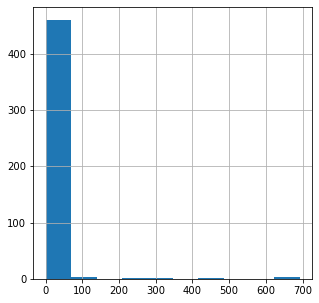

In [101]:
num_bins = 10
event.hist(bins = num_bins, figsize=(5,5))
plt.show()

#### Speaker variable

In [107]:
speaker = df5['speaker'].value_counts() 
speaker

Larry Brilliant       198
Karen Armstrong       198
 JR                   197
Charmian Gooch        197
James Nachtwey        197
                     ... 
Margrethe Vestager      1
Elizabeth Wayne         1
Kristin Poinar          1
Paul Tasner             1
Rick Warren             1
Name: speaker, Length: 2891, dtype: int64

In [109]:
df_spkr = df5[["speaker","views"]]
df_spkr

,speaker,views
1,Tim Nevius,438573
3,Kate Lister,569477
4,Michael Levin,122682
5,Archie Crowley,562325
7,Andrew Youn,53131
...,...,...
7162,Hans Rosling,14986826
7163,Sir Ken Robinson,70176973
7164,Majora Carter,2849888
7165,David Pogue,1973959


In [110]:
df_spkr = df_spkr.groupby('speaker').views.agg(['count','mean']).reset_index().sort_values(by = 'count', ascending = False)

In [111]:
df_spkr

,speaker,count,mean
1470,Karen Armstrong,198,1.431372e+06
1597,Larry Brilliant,198,1.440089e+06
7,JR,197,1.433595e+06
423,Cameron Sinclair,197,1.435807e+06
793,E.O. Wilson,197,1.440264e+06
...,...,...,...
1034,Greg Anderson,1,9.879230e+05
1035,Greg Asner,1,8.022190e+05
1037,Greg Lynn,1,4.437590e+05
1038,Greg Stone,1,5.390590e+05


<AxesSubplot:xlabel='count'>

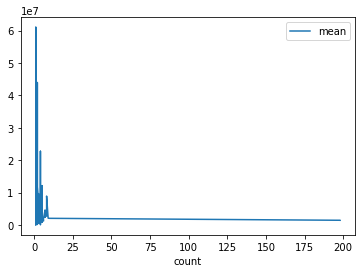

In [112]:
df_spkr.plot( 'count','mean')

In [31]:
## the avg viewership is left skewed. less the speaker frequency more is the viewership. 

In [32]:
df5['event'].value_counts() 

TED2007               692
TED2006               663
TED2005               660
TED2008               468
TED2009               282
                     ... 
TEDxLeuvenSalon         1
TEDxUMKC                1
TEDxAmsterdamWomen      1
TEDxAarhus              1
TEDxYouth@München       1
Name: event, Length: 471, dtype: int64

In [33]:
df_event = df5[["event","views"]]
df_event

,event,views
1,TEDxDayton,438573
3,TEDxUniversityofGlasgow,569477
4,TED2020,122682
5,TEDxUofSC,562325
7,TED2020,53131
...,...,...
7162,TED2006,14986826
7163,TED2006,70176973
7164,TED2006,2849888
7165,TED2006,1973959


In [34]:
df_event = df_event.groupby('event').views.agg(['count','mean']).reset_index().sort_values(by = 'count', ascending = False)

In [35]:
df_event

,event,count,mean
65,TED2007,692,1.475396e+06
64,TED2006,663,1.261242e+06
63,TED2005,660,9.891528e+05
66,TED2008,468,1.284823e+06
67,TED2009,282,3.094531e+06
...,...,...,...
275,TEDxGöteborg 2010,1,5.663090e+05
276,TEDxHamburg,1,9.995710e+05
277,TEDxHampshireCollege,1,1.046481e+06
278,TEDxHelvetia,1,1.372767e+06


<AxesSubplot:xlabel='count'>

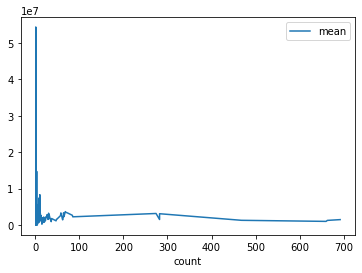

In [36]:
df_event.plot( 'count','mean') ## events on the lower count has high avg viewership. could be due to the popularity of the event. 

In [39]:
df5['speaker_occ'].value_counts() 

Photographer                                     219
Filmmaker                                        216
Biologist                                        212
Activist                                         207
Oceanographer                                    204
                                                ... 
General counsel, author, "idea acupuncturist"      1
Writer, youth worker, freedom fighter              1
Space engineer and development scholar             1
Agriculturalist, social entrepreneur               1
Pastor, author                                     1
Name: speaker_occ, Length: 2035, dtype: int64

In [114]:
duration = df5[["views","duration"]]

In [123]:
import plotly.express as px
fig = px.scatter(duration, x='views', y='duration', title="Views vs Duration",width=1000, height=400 )
fig.show()

In [42]:
## Checking the trends

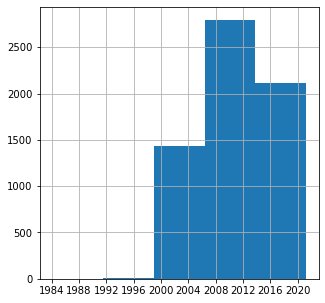

In [125]:
num_bins = 5
df5["recorded_at"].hist(bins = num_bins, figsize=(5,5))
plt.savefig("HistogramPlots.png") ## for memo!
plt.show()

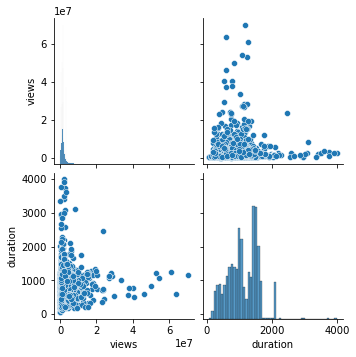

In [45]:
import seaborn as sns ## pairplot with different views of views vs duration
sns.pairplot(df5)

#### Text data processing

the scatter plot shows that the data is more concentrated at lower duration and at higher duration, the views are lower. 

In [46]:
### Text variables pre-processing 
## I found three text variables to be useful for the analysis -- title,transcript,tags. combining these three 
## into one category. 

In [47]:
df5["final_text"] = df5["title"] + df5["transcript"] + df5["tags"]

In [48]:
## NLTK 

In [49]:
##Cleaning the text data column ## text preprocessing options - re,nltk,spacy, opted nltk. 
import nltk
import re


In [50]:
df5["final_text"]

1       The exploitation of US college athletesIn coll...
3       An honest history of an ancient and "nasty" wo...
4       The electrical blueprints that orchestrate lif...
5       Language around gender and identity evolves (a...
7       The seeds of change helping African farmers gr...
                              ...                        
7162    The best stats you've ever seenAbout 10 years ...
7163    Do schools kill creativity?Good morning. How a...
7164    Greening the ghettoIf you're here today — and ...
7165    Simplicity sells(Music: "The Sound of Silence,...
7166    Averting the climate crisisThank you so much, ...
Name: final_text, Length: 6357, dtype: object

In [51]:
import string

In [52]:
## Lemmatizaion - Opted for Lematization over stemming as stemming stems unwanted words. ##lematization works by matching the word with the dictionary word. 

In [53]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [54]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
stopword = set(stopwords.words('english'))
print(stopword)

{'my', 'theirs', "haven't", 'our', 'i', 'to', 'over', 'each', 'hasn', 'd', 'through', 'had', 'than', 'yourself', 'having', 'didn', "hadn't", 'hers', 'doing', "needn't", 'more', 're', 'own', 'then', 'doesn', 'themselves', 'whom', 'at', 'on', 'won', 'here', 'itself', "you'll", 'there', 'isn', 'up', 'mustn', 'no', 'above', 'during', 'down', 'an', 'them', 'can', "doesn't", 'other', 've', 'if', 'shouldn', 'until', 'once', 's', 'where', 'myself', "you've", 'which', 'was', 'o', 'am', 'all', 'couldn', 'are', "didn't", 'did', 'do', 'when', 'while', 'as', 'ours', 'were', 'being', 'm', 'hadn', 'between', 'why', "wouldn't", "shan't", 'weren', 'll', 'off', 'the', 'and', 'have', 'with', 'so', 'wasn', 'about', 'that', 'just', 'ma', 'but', 'needn', 'or', 'now', 't', 'out', 'him', 'most', 'their', 'in', 'yourselves', 'has', 'ourselves', 'his', 'how', 'aren', 'nor', 'is', 'who', 'wouldn', 'should', 'mightn', "won't", "shouldn't", "should've", 'these', 'does', 'few', 'into', "wasn't", 'don', 'haven', "mu

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\VIOLIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\VIOLIN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\VIOLIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [55]:
def process_text(text):
  # Lower Casing
    text = text.lower()
    text=text[1:] 
    #Remove punctuations
    text = text.translate(str.maketrans("","",string.punctuation))
    #tokenizing words
    tokens = word_tokenize(text)
    #Removing Stop Words
    final_tokens = [w for w in tokens if w not in stopword]
    #reducing a word to its word stem 
    wordLemm = WordNetLemmatizer()
    finalwords=[]
    for w in final_tokens:
      if len(w)>1:
        word = wordLemm.lemmatize(w)
        finalwords.append(word)
    return ' '.join(finalwords)

In [56]:
df5['processed_text'] = df5["final_text"].apply(lambda x: process_text(x))
print('Text Preprocessing complete.')

Text Preprocessing complete.


In [57]:
df5['processed_text']

1       exploitation u college athletesin college spor...
3       honest history ancient nasty wordfirst warning...
4       electrical blueprint orchestrate lifechris and...
5       anguage around gender identity evolves always ...
7       seed change helping african farmer grow povert...
                              ...                        
7162    best stats youve ever seenabout 10 year ago to...
7163    school kill creativitygood morning youaudience...
7164    reening ghettoif youre today im happy youve he...
7165    implicity sellsmusic sound silence simon amp g...
7166    verting climate crisisthank much chris truly g...
Name: processed_text, Length: 6357, dtype: object

#### Text vectorization

In [59]:
vectorizer = TfidfVectorizer()

In [126]:
X = vectorizer.fit_transform(df5['processed_text'])


In [61]:
X.shape

(6357, 124435)

#### Topic Modelling - Unsupervised ML - LDA

In [62]:
#  Instantiate LDA 2
lda = LatentDirichletAllocation(n_components=15,
                                       random_state=42)

In [63]:
# 
doc_topics = lda.fit_transform(X)

In [64]:

lda_viz = pyLDAvis.sklearn.prepare(lda_model=lda,
                                  dtm=X,
                                  vectorizer=vectorizer,
                                  sort_topics=False)

C:\Users\VIOLIN\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


In [65]:
pyLDAvis.display(lda_viz)

# pyLDAvis
# Left panel: 
    # global view of topic model
    # centers of circle are distance between topics then projected onto two dimensions
    # area of circles is the overall prevalence of the topic in the whole topic model
    # examine how prevalent each topic is
    # examine how topics relate to each other
# Right panel:
    # Bars represent individual terms that are most useful for interpreting selected topic on left
    # Blue bar represents corpus wide frequencies
    # Red bar represents topic-specific frequencies
    # examine the meaning of each topic

In [66]:
#  Instantiate LDA 2
lda = LatentDirichletAllocation(n_components=10,
                                       random_state=42)

In [67]:
# 
doc_topics = lda.fit_transform(X)

In [68]:

lda_viz = pyLDAvis.sklearn.prepare(lda_model=lda,
                                  dtm=X,
                                  vectorizer=vectorizer,
                                  sort_topics=False)

In [69]:
pyLDAvis.display(lda_viz)

# pyLDAvis
# Left panel: 
    # global view of topic model
    # centers of circle are distance between topics then projected onto two dimensions
    # area of circles is the overall prevalence of the topic in the whole topic model
    # examine how prevalent each topic is
    # examine how topics relate to each other
# Right panel:
    # Bars represent individual terms that are most useful for interpreting selected topic on left
    # Blue bar represents corpus wide frequencies
    # Red bar represents topic-specific frequencies
    # examine the meaning of each topic

In [72]:
#  Instantiate LDA 3, n_components=7
lda = LatentDirichletAllocation(n_components=7,
                                       random_state=42)

In [73]:
# 
doc_topics = lda.fit_transform(X)

In [74]:
lda_viz = pyLDAvis.sklearn.prepare(lda_model=lda,
                                  dtm=X,
                                  vectorizer=vectorizer,
                                  sort_topics=False)

In [75]:
pyLDAvis.display(lda_viz)

# pyLDAvis
# Left panel: 
    # global view of topic model
    # centers of circle are distance between topics then projected onto two dimensions
    # area of circles is the overall prevalence of the topic in the whole topic model
    # examine how prevalent each topic is
    # examine how topics relate to each other
# Right panel:
    # Bars represent individual terms that are most useful for interpreting selected topic on left
    # Blue bar represents corpus wide frequencies
    # Red bar represents topic-specific frequencies
    # examine the meaning of each topic

#### Sentiment Analysis ## Unsupervised ML ## Transformers 

In [81]:
df5.dtypes

title                          object
transcript                     object
speaker                        object
speaker_occ                    object
talk_desc                      object
event                          object
views                           int64
duration                        int64
tags                           object
recorded_at       datetime64[ns, UTC]
final_text                     object
processed_text                 object
polarity                       object
dtype: object

In [83]:
def polarity(text):
    try:
        return TextBlob(text).sentiment ##applying textblob
    except:
        return None

df5['polarity'] = df5["transcript"].apply(polarity)
df5.head(3)

,title,transcript,speaker,speaker_occ,talk_desc,event,views,duration,tags,recorded_at,final_text,processed_text,polarity
1,The exploitation of US college athletes,"In college sports, American universities are e...",Tim Nevius,College sports lawyer,Colleges and universities in the US make billi...,TEDxDayton,438573,611,"['sports', 'law', 'education', 'United States'...",2020-11-10 00:00:00+00:00,The exploitation of US college athletesIn coll...,exploitation u college athletesin college spor...,"(0.15286179463811042, 0.4724605073289283)"
3,"An honest history of an ancient and ""nasty"" word","First, a warning. As far as offensive words go...",Kate Lister,Sex historian,"With candor and cunning, sex historian Kate Li...",TEDxUniversityofGlasgow,569477,1148,"['sex', 'language', 'ancient world', 'history'...",2020-03-06 00:00:00+00:00,"An honest history of an ancient and ""nasty"" wo...",honest history ancient nasty wordfirst warning...,"(0.11947039072039083, 0.5034354226020893)"
4,The electrical blueprints that orchestrate life,"Chris Anderson: Mike, welcome. It's good to se...",Michael Levin,Bioelectric explorer,DNA isn't the only builder in the biological w...,TED2020,122682,1176,"['biology', 'science', 'invention', 'robots', ...",2020-05-18 00:00:00+00:00,The electrical blueprints that orchestrate lif...,electrical blueprint orchestrate lifechris and...,"(0.15999142502118685, 0.5116180512609086)"


In [84]:
df5['polarity'].value_counts

<bound method IndexOpsMixin.value_counts of 1       (0.15286179463811042, 0.4724605073289283)
3       (0.11947039072039083, 0.5034354226020893)
4       (0.15999142502118685, 0.5116180512609086)
5       (0.13851678992303995, 0.5012463173400672)
7        (0.2997032008395644, 0.5031926406926406)
                          ...                    
7162     (0.0933981240981241, 0.4420296777296776)
7163     (0.1498067699124037, 0.4617599367247254)
7164     (0.0829276014990301, 0.4391650677364963)
7165      (0.1365787118506784, 0.475229322049406)
7166    (0.15777463614384146, 0.4241012776774367)
Name: polarity, Length: 6357, dtype: object>

In [88]:
df5[['pol','sub']] = pd.DataFrame(df5["polarity"].tolist(), index= df5.index)
df5.head(3) ## seperating polairty score

,title,transcript,speaker,speaker_occ,talk_desc,event,views,duration,tags,recorded_at,final_text,processed_text,polarity,pol,sub
1,The exploitation of US college athletes,"In college sports, American universities are e...",Tim Nevius,College sports lawyer,Colleges and universities in the US make billi...,TEDxDayton,438573,611,"['sports', 'law', 'education', 'United States'...",2020-11-10 00:00:00+00:00,The exploitation of US college athletesIn coll...,exploitation u college athletesin college spor...,"(0.15286179463811042, 0.4724605073289283)",0.152862,0.472461
3,"An honest history of an ancient and ""nasty"" word","First, a warning. As far as offensive words go...",Kate Lister,Sex historian,"With candor and cunning, sex historian Kate Li...",TEDxUniversityofGlasgow,569477,1148,"['sex', 'language', 'ancient world', 'history'...",2020-03-06 00:00:00+00:00,"An honest history of an ancient and ""nasty"" wo...",honest history ancient nasty wordfirst warning...,"(0.11947039072039083, 0.5034354226020893)",0.119470,0.503435
4,The electrical blueprints that orchestrate life,"Chris Anderson: Mike, welcome. It's good to se...",Michael Levin,Bioelectric explorer,DNA isn't the only builder in the biological w...,TED2020,122682,1176,"['biology', 'science', 'invention', 'robots', ...",2020-05-18 00:00:00+00:00,The electrical blueprints that orchestrate lif...,electrical blueprint orchestrate lifechris and...,"(0.15999142502118685, 0.5116180512609086)",0.159991,0.511618


In [90]:
def label_sentiment (row): ##converting the polarity value into sentiment
   if row['pol'] < 0 :
      return 'Negative'
   if row['pol'] >= 0 :
      return 'Positive'

In [134]:
df5["sentiment_tb"] = df5.apply (lambda row: label_sentiment(row), axis=1)
df5["sentiment_tb"].value_counts()

Positive    6307
Negative      50
Name: sentiment_tb, dtype: int64

In [135]:
subjectivity = df5[["sub","views"]]

In [139]:
polarity= df5[["pol","views"]]

In [141]:
import plotly.express as px
fig = px.scatter(polarity, x='pol', y='views', title="Views vs Polarity",width=1000, height=400 )
fig.show()

In [146]:
import plotly.express as px
fig = px.scatter(subjectivity, x='sub', y='views', title="Views vs Subjectivity",width=1000, height=400 )
fig.show()